# Zindi Mobile Money and Financial Inclusion in Tanzania challenge
The train dataset contains demographic information and what financial services are used by approximately 10,000 individuals across Tanzania. This data was extracted from the FSDT Finscope 2017 survey and prepared specifically for this challenge. More about the Finscope survey here.

Each individual is classified into four mutually exclusive categories:

- No_financial_services: Individuals who do not use mobile money, do not save, do not have credit, and do not have insurance
- Other_only: Individuals who do not use mobile money, but do use at least one of the other financial services (savings, credit, insurance)
- Mm_only: Individuals who use mobile money only
- Mm_plus: Individuals who use mobile money and also use at least one of the other financial services (savings, credit, insurance) Financial Access Map

This dataset is the geospatial mapping of all cash outlets in Tanzania in 2012. Cash outlets in this case included commercial banks, community banks, ATMs, microfinance institutions, mobile money agents, bus stations and post offices. This data was collected by FSDT.

In [92]:
# Loading in required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Instruction 1
1. Examine the dataset. Are there any missing observations or columns where the data do not seem valid?

In [93]:
# CODE for instruction 1
# Reading in the data
mob_money = pd.read_csv("training.csv")
mob_money.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [94]:
mob_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                             7094 non-null int64
Q1                             7094 non-null int64
Q2                             7094 non-null int64
Q3                             7094 non-null int64
Q4                             7094 non-null int64
Q5                             7094 non-null int64
Q6                             7094 non-null int64
Q7                             7094 non-null int64
Q8_1                           7094 non-null int64
Q8_2                           7094 non-null int64
Q8_3                           7094 non-null int64
Q8_4                           7094 non-null int64
Q8_5                           7094 non-null int64
Q8_6                           7094 non-null int64
Q8_7                           7094 non-null int64
Q8_8                           7094 non-null int64
Q8_9                           7094 non-null int64
Q8_10                     

In [95]:
mob_money.isnull().sum()

ID                             0
Q1                             0
Q2                             0
Q3                             0
Q4                             0
Q5                             0
Q6                             0
Q7                             0
Q8_1                           0
Q8_2                           0
Q8_3                           0
Q8_4                           0
Q8_5                           0
Q8_6                           0
Q8_7                           0
Q8_8                           0
Q8_9                           0
Q8_10                          0
Q8_11                          0
Q9                             0
Q10                            0
Q11                            0
Q12                            0
Q13                            0
Q14                            0
Q15                            0
Q16                            0
Q17                            0
Q18                            0
Q19                            0
Latitude  

## Instruction 2
2. Get basic descriptive statistics for the dataset.

In [96]:
# CODE for instruction 2
mob_money.describe()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


In [97]:
print(mob_money['Q2'].unique())
mob_money['Q2']= ['Female' if each==2 else 'Male' for each in mob_money['Q2']]
#mob_money['mobile_money_classification']= ['None' if each==0 else 'AtLeastOther' if each==1 else 'AtLeastOther' if each==2 else 'AtLeastOther' for each in mob_money['Q2']]

[2 1]


## Instruction 3
3. Create appropriate graphs to visually represent the relationship between financial services accessed (non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income.

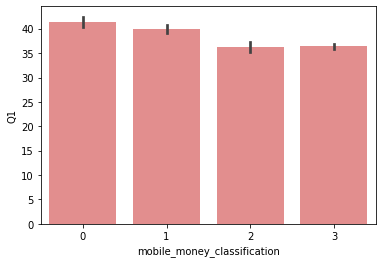

In [98]:
# CODE for instruction 3
sns.barplot(x = 'mobile_money_classification', y = 'Q1', data = mob_money, color = 'lightcoral')

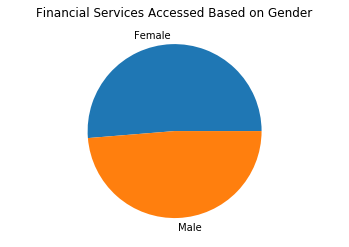

array(['Female', 'Male'], dtype=object)

In [100]:
piechart = mob_money.groupby(mob_money['Q2'])['mobile_money_classification'].sum()
plt.axis('equal')
plt.pie(piechart, labels=piechart.index)
plt.title('Financial Services Accessed Based on Gender')
plt.show()
mob_money['Q2'].unique()

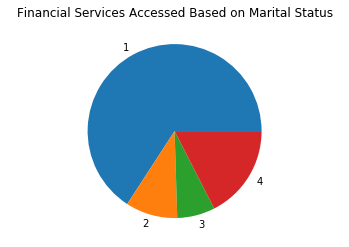

In [102]:
piechart = mob_money.groupby(mob_money['Q3'])['mobile_money_classification'].sum()
plt.axis('equal')
plt.pie(piechart, labels=piechart.index)
plt.title('Financial Services Accessed Based on Marital Status')
plt.show()
# mob_money['Q3']unique()

## Instruction 4
4. Create appropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.

In [5]:
# CODE for instruction 4


## Instruction 5
5. Create a map to visually explore geographic distribution of mobile services coverage with respect to type of income.

In [6]:
# CODE for instruction 5


## Instruction 6
6. What can you conclude about use of financial services in Tanzania? Which demographic and geographic factors are associated with mobile money use?

In [7]:
# CODE for instruction 6
